

# Clustering with DBSCAN

In [1]:
# Do not import anything else
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN # only on last problem

# DBSCAN

## Load the Density Data and try K-means



[[-0.197898   0.5859046]
 [ 1.19404   -0.0812588]]


Text(0, 0.5, 'y')

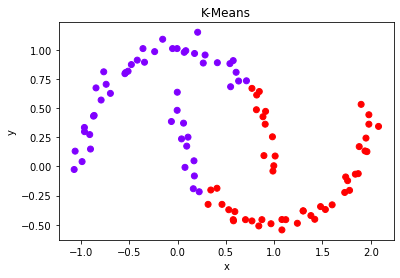

In [2]:
df_dbscan = pd.read_csv('data_dbscan.csv')
k = 2
X = df_dbscan

# Call k_means with k = 2
cluster = KMeans(n_clusters = k, random_state = 0).fit(X)
print(cluster.cluster_centers_)
# your code here
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("K-Means")
plt.xlabel('x')
plt.ylabel('y')

## Implement Range Query
 

In [3]:
def range_query( df_data, q_index, eps ):
    # your code here
    neighbors = []
    for index, row in df_data.iterrows():
        if np.linalg.norm(row - df_data.iloc[q_index]) <= eps:
            neighbors.append(index)
    
    return df_data.iloc[neighbors]

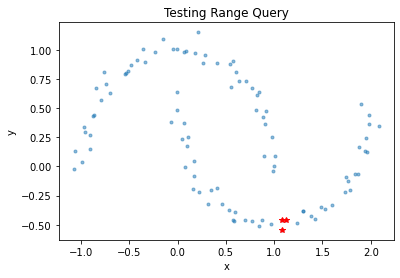

In [4]:
# Test it out
df_n = range_query( df_dbscan, 0, 0.1 )
plt.plot( df_dbscan['x'], df_dbscan['y'], '.', alpha = 0.5 )
plt.plot( df_n['x'], df_n['y'], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Range Query')
plt.show()

## DBSCAN

```
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}
```

In [5]:
def dbscan( df_data, eps, min_pts ):
    NOISE_LABEL = 0
    C = 0
    label = pd.Series([None for x in range(len(df_data))])
    for P, values in df_data.iterrows():
        if label[P] is not None:
            continue
        neighbors = range_query(df_data, P, eps)
        if len(neighbors) < min_pts:
            label[P] = NOISE_LABEL
            continue
        C += 1
        label[P] = C
        seedSet = list(neighbors.copy().drop(P).index)
        
        for Q in seedSet:
            if label[Q] == NOISE_LABEL:
                label[Q] = C
                continue
            if label[Q] is not None:
                continue
            label[Q] = C
            neighbors = list(range_query(df_data, Q, eps).index)
            if len(neighbors) >= min_pts:
                seedSet.extend(neighbors)
    return label
    # your code here

In [6]:
# Test it out
s_cluster_assignment = dbscan( df_dbscan, 0.23, 6)
s_cluster_assignment.value_counts()

1    49
2    48
0     3
dtype: int64

## Plot the Results 


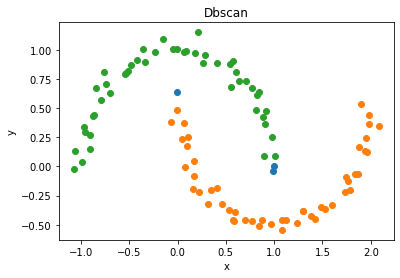

In [7]:
# Plot each cluster
# your code here
for k in range(len(s_cluster_assignment)):
    plt.scatter(df_dbscan[s_cluster_assignment == k]['x'], df_dbscan[s_cluster_assignment == k]['y'], cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dbscan')
plt.show()

## Compare results with the scikit-learn library


Frequency of unique values of the scikit-learn array:
[[-1  0  1]
 [ 3 49 48]]


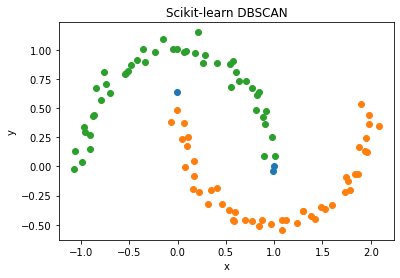

In [10]:
# check your implementation vs scikit-learn
from sklearn.cluster import DBSCAN
# your code here

#clustering = DBSCAN(df_dbscan, 0.23, 6)
clustering = DBSCAN(eps=.23, min_samples=6).fit(df_dbscan)
clustering.labels_

unique_elements, counts_elements = np.unique(clustering.labels_, return_counts=True)
cluster_series = pd.Series(clustering.labels_)
print("Frequency of unique values of the scikit-learn array:")
print(np.asarray((unique_elements, counts_elements)))
s_cluster_assignment.value_counts()
for i in unique_elements:
    plt.scatter(df_dbscan[cluster_series== i]['x'], df_dbscan[cluster_series == i]['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scikit-learn DBSCAN')
plt.show()

We can see by finding the value counts of the scikit-learn labels that it clusters the same amount of values as our solution.  The only difference is the label assigned to each cluster.  For example, a cluster of three elements in our solution is represented by the label 0 whereas in scikit-learn the label is instead -1.  This difference is ultimately trivial in the analysis of the clusters.